In [1]:
# 환경 설정
from mlwpy import *
%matplotlib inline

iris = datasets.load_iris()

# iris 데이터셋
tts = skms.train_test_split(iris.data, iris.target, 
                            test_size=.33, random_state=21)
(iris_train_ftrs, iris_test_ftrs, 
 iris_train_tgt,  iris_test_tgt) = tts

# 이진 분류 문제
useclass = 1
tts_1c = skms.train_test_split(iris.data, iris.target==useclass, 
                               test_size=.33, random_state = 21)
(iris_1c_train_ftrs, iris_1c_test_ftrs, 
 iris_1c_train_tgt,  iris_1c_test_tgt) = tts_1c

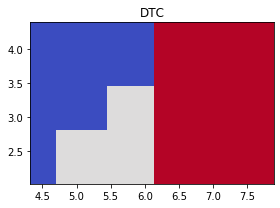

In [2]:
tree_classifiers = {'DTC' : tree.DecisionTreeClassifier(max_depth=3)}

fig, ax = plt.subplots(1,1,figsize=(4,3))
for name, mod in tree_classifiers.items():
    # [0, 1] [sepal len/width]만을 이용해서 예측을 수행하고 경계를 그립니다.
    plot_boundary(ax, iris.data, iris.target, mod, [0,1])
    ax.set_title(name)
plt.tight_layout()

In [3]:
dtc = tree.DecisionTreeClassifier()
skms.cross_val_score(dtc, 
                     iris.data, iris.target, 
                     cv=3, scoring='accuracy')

array([0.9804, 0.9216, 0.9792])

In [4]:
iris_1c_tree = (tree.DecisionTreeClassifier()
                    .fit(iris_1c_train_ftrs, iris_1c_train_tgt))

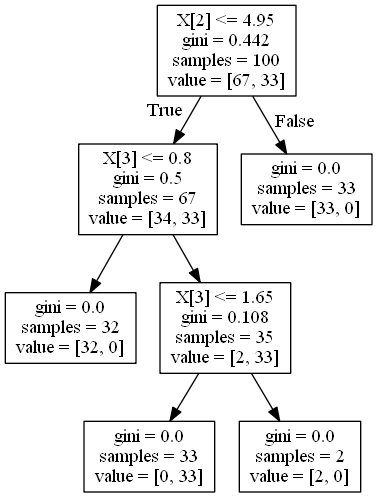

In [5]:
"""
아래 코드 실행시 오류가 나면..
pydot.InvocationException: GraphViz's executables not found

맥 terminal에서 아래 명령어를 실행해서 설치하면 됩니다.
brew install graphviz
pip install -U pydotplus

"""
# 라이브러리를 추가로 설치합니다. 아래 명령어 중 하나를 선택해 실행합니다.
# conda install pydotplus
# pip install pydotplus
import pydotplus 
dot_data = tree.export_graphviz(iris_1c_tree, out_file=None) 
graph = pydotplus.graph_from_dot_data(dot_data)
graph.write_png("outputs/iris_1c.png")
Image("outputs/iris_1c.png", width=75, height=75)

In [6]:
iris_tree = (tree.DecisionTreeClassifier()
                 .fit(iris_train_ftrs, iris_train_tgt))

'rm'은(는) 내부 또는 외부 명령, 실행할 수 있는 프로그램, 또는
배치 파일이 아닙니다.


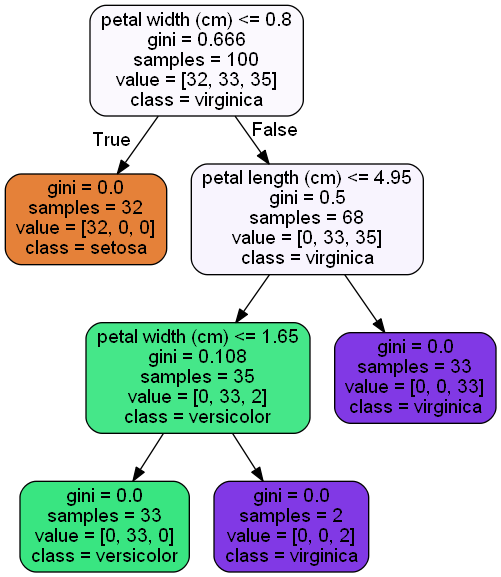

In [7]:
# .dot 파일을 만드는데 별도의 라이브러리는 필요없습니다.
with open("outputs/iris.dot", 'w') as f:
    dot_data = tree.export_graphviz(iris_tree, out_file=f, 
                                    feature_names=iris.feature_names,  
                                    class_names=iris.target_names,  
                                    filled=True, rounded=True)

# 아래 !로 시작하는 줄은 “쉘" 커맨드입니다.
# 이 커맨드는 ‘dot’ 프로그램을 이용해서 dot을 png로 바꿔줍니다.
!dot -Tpng outputs/iris.dot -o outputs/iris.png
!rm outputs/iris.dot

Image("outputs/iris.png", width=140, height=140)

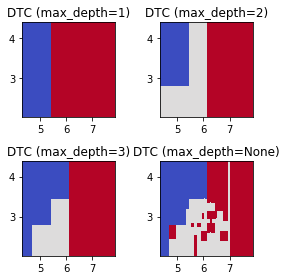

In [8]:
fig, axes = plt.subplots(2,2,figsize=(4,4))

depths = [1, 2, 3, None]
for depth, ax in zip(depths, axes.flat):
    dtc_model = tree.DecisionTreeClassifier(max_depth=depth)
    # plot_boundary 함수는 지정한 열 [0, 1]만 사용합니다.
    # 따라서 여기서는 sepal length와 width만 사용하여 예측을 수행합니다.
    plot_boundary(ax, iris.data, iris.target, dtc_model, [0,1])
    ax.set_title("DTC (max_depth={})".format(dtc_model.max_depth))

plt.tight_layout()

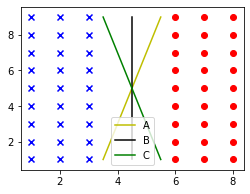

In [9]:
fig, ax = plt.subplots(1,1,figsize=(4,3))

# 포인트들의 가위곱을 구하는 멋진 방법입니다.
left  = np.mgrid[1:4.0, 1:10].reshape(2, -1).T
right = np.mgrid[6:9.0, 1:10].reshape(2, -1).T

# 데이터 포인트
ax.scatter(left[:,0] , left[:,1] , c='b', marker='x')
ax.scatter(right[:,0], right[:,1], c='r', marker='o')

# 분리 직선
ax.plot([3.5, 5.5], [1,9], 'y', label='A')
ax.plot([4.5, 4.5], [1,9], 'k', label='B')
ax.plot([3.5, 5.5], [9,1], 'g', label='C')
ax.legend(loc='lower center');

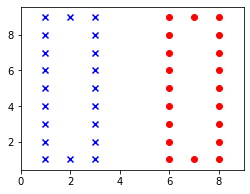

In [10]:
fig, ax = plt.subplots(1,1,figsize=(4,3))

# 포인트들의 가위곱을 구합니다.
left  = np.mgrid[1:4:2, 1:10].reshape(2, -1).T
right = np.mgrid[6:9:2, 1:10].reshape(2, -1).T

ax.scatter(left[:,0] , left[:,1] , c='b', marker='x')
ax.scatter([2,2], [1,9], c='b', marker='x')
ax.scatter(right[:,0], right[:,1], c='r', marker='o')
ax.scatter([7,7], [1,9], c='r', marker='o')
ax.set_xlim(0,9);

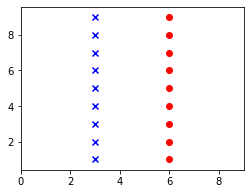

In [11]:
fig, ax = plt.subplots(1,1,figsize=(4,3))

left  = np.mgrid[3:4, 1:10].reshape(2, -1).T
right = np.mgrid[6:7, 1:10].reshape(2, -1).T

ax.scatter(left[:,0] , left[:,1] , c='b', marker='x')
ax.scatter(right[:,0], right[:,1], c='r', marker='o')
ax.set_xlim(0,9);

In [12]:
sv_classifiers = {"SVC(Linear)"   : svm.SVC(kernel='linear'),
                  "NuSVC(Linear)" : svm.NuSVC(kernel='linear', nu=.9)} 

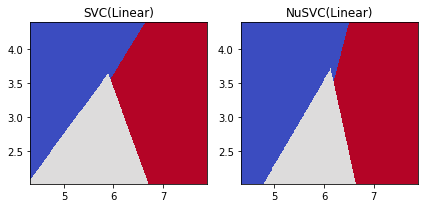

In [13]:
fig, axes = plt.subplots(1,2,figsize=(6,3))
for (name, mod), ax in zip(sv_classifiers.items(), axes.flat):
    plot_boundary(ax, iris.data, iris.target, mod, [0,1])
    ax.set_title(name)
plt.tight_layout()

In [14]:
def do_linear_svc_separators(svc_maker, pname, params, ax):
    'svc(params)를 만들고 분리 경계를 그립니다.'
    xys = (np.linspace(2,8,100),
           np.linspace(2,8,100))

    for p in params:
        kwargs = {pname:p, 'kernel':'linear'}
        svc = svc_maker(**kwargs).fit(ftrs, tgt)
        # plot_separator 함수는 mlwpy.py에 구현되어 있습니다.
        plot_separator(svc, *xys, 
                       '{}={:g}'.format(pname, p), ax=ax)

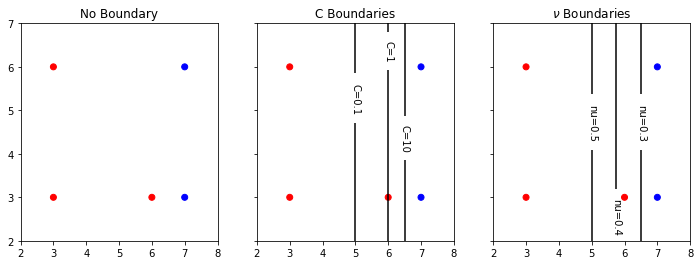

In [15]:
ftrs = np.array([[3,3],
                 [3,6],
                 [7,3],
                 [7,6],
                 [6,3]])
tgt  = np.array([0,0,1,1,0])
colors = np.array(['r', 'b'])

Cs = [.1, 1.0, 10]
nus = [.3, .4, .5]

fig, axes = plt.subplots(1,3,figsize=(12,4),
                         sharex=True, sharey=True)
for ax in axes:
    ax.scatter(ftrs[:,0], ftrs[:,1], c=colors[tgt])
ax.set_xlim(2,8); ax.set_ylim(2,7)

do_linear_svc_separators(svm.SVC,   "C",   Cs, axes[1])
do_linear_svc_separators(svm.NuSVC, "nu", nus, axes[2])

axes[0].set_title("No Boundary")
axes[1].set_title("C Boundaries")
axes[2].set_title(r"$\nu$ Boundaries");

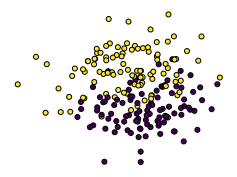

In [16]:
ftrs, tgt = datasets.make_blobs(centers=2,
                                n_features=3,
                                n_samples=200,
                                center_box = [-2.0, 2.0],
                                random_state=1099)

# 세가지 특성을 모두 사용하지만 그래프에는 두가지만 표현합니다.
fig, ax = plt.subplots(1,1,figsize=(4,3))
ax.scatter(ftrs[:, 0], ftrs[:, 1], 
           marker='o', c=tgt, s=25, edgecolor='k')
ax.axis('off');

In [17]:
nus = np.linspace(0.05, .85, 9)
tt = skms.validation_curve(svm.NuSVC(kernel='linear'), 
                           ftrs, tgt, 
                           param_name='nu',
                           param_range=nus,
                           cv=5)

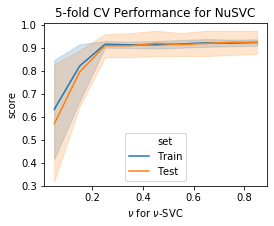

In [18]:
fig,ax = plt.subplots(1,1,figsize=(4,3))

tidy_df = sk_graph_to_tidy(tt, nus, 'nu', 5)
ax = sns.lineplot(x='nu', y='score', hue='set', data=tidy_df)

ax.set_title('5-fold CV Performance for NuSVC')
ax.set_xlabel("\n".join([r'$\nu$ for $\nu$-SVC']))
ax.set_ylim(.3, 1.01)
ax.legend(loc='lower center');

In [19]:
cs = [0.0001, 0.001, 0.01, .1, 1.0, 10, 100, 1000]
tt = skms.validation_curve(svm.SVC(kernel='linear'), 
                           ftrs, tgt, 
                           param_name='C',
                           param_range=cs,
                           cv=5)

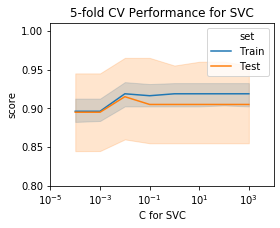

In [20]:
fig,ax = plt.subplots(1,1,figsize=(4,3))

tidy_df = sk_graph_to_tidy(tt, cs, 'c', 5)
ax = sns.lineplot(x='c',y='score',hue='set',data=tidy_df)

ax.set_title('5-fold CV Performance for SVC')
ax.set_xlabel("\n".join([r'C for SVC']))
ax.set_ylim(.8, 1.01)
ax.set_xlim(.00001, 10001)
ax.set_xscale('log')

In [21]:
def simple_argmax(arr):
    ' np.argmax를 무언가 쓸만한 것으로 바꿔주는 헬퍼함수'
    return np.array(np.unravel_index(np.argmax(arr), 
                                     arr.shape))

def df_names(df, idxs):
    ' 숫자를 인덱스와 컬럼으로 바꿔주는 헬퍼함수'
    r,c = idxs
    return df.index[r], df.columns[c]

In [22]:
base_bets = np.arange(1,12,2)
mark_bet, andy_bet = np.meshgrid(base_bets, base_bets)

mark_winnings = .1 * andy_bet + .9 * -mark_bet

df = pd.DataFrame(mark_winnings, 
                  index  =base_bets, 
                  columns=base_bets)
df.index.name = "Andy Bet"
df.columns.name = "Mark Bet"

print("Best Betting Scenario (for Mark) for These Values:")
print("(Andy, Mark):", df_names(df, simple_argmax(mark_winnings)))

display(df)

Best Betting Scenario (for Mark) for These Values:
(Andy, Mark): (11, 1)


Mark Bet,1,3,5,7,9,11
Andy Bet,,,,,,
1,-0.8000,-2.6000,-4.4000,-6.2000,-8.0000,-9.8000
3,-0.6000,-2.4000,-4.2000,-6.0000,-7.8000,-9.6000
5,-0.4000,-2.2000,-4.0000,-5.8000,-7.6000,-9.4000
7,-0.2000,-2.0000,-3.8000,-5.6000,-7.4000,-9.2000
9,0.0000,-1.8000,-3.6000,-5.4000,-7.2000,-9.0000
11,0.2000,-1.6000,-3.4000,-5.2000,-7.0000,-8.8000


In [23]:
tail_probs = [0.0, .001, .01, .05, .10, .25, 1.0/3.0]

lwr_probs = np.array(tail_probs)
upr_probs = 1-lwr_probs[::-1]
cent_prob = np.array([.5])

probs = np.concatenate([lwr_probs, cent_prob, upr_probs])

# 0으로 나눌 때 발생하는 에러를 편하게 처리할 수 있습니다.
with np.errstate(divide='ignore'):
    odds     = probs / (1-probs)
    log_odds = np.log(odds)

index=["{:4.1f}%".format(p) for p in np.round(probs,3)*100]

polo_dict = co.OrderedDict([("Prob(E)",       probs), 
                            ("Odds(E:not E)", odds), 
                            ("Log-Odds",      log_odds)])
polo_df = pd.DataFrame(polo_dict, index=index)
polo_df.index.name="Pct(%)"
polo_df

,Prob(E),Odds(E:not E),Log-Odds
Pct(%),,,
0.0%,0.0000,0.0000,-inf
0.1%,0.0010,0.0010,-6.9068
1.0%,0.0100,0.0101,-4.5951
5.0%,0.0500,0.0526,-2.9444
10.0%,0.1000,0.1111,-2.1972
25.0%,0.2500,0.3333,-1.0986
33.3%,0.3333,0.5000,-0.6931
50.0%,0.5000,1.0000,0.0000
66.7%,0.6667,2.0000,0.6931


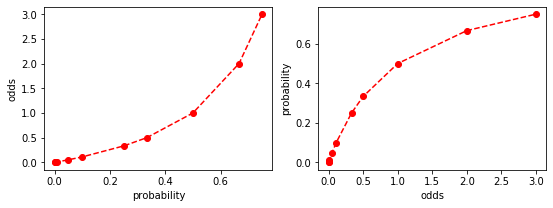

In [24]:
def helper(ax,x,y,x_name,y_name):
    ax.plot(x,y, 'r--o')
    ax.set_xlabel(x_name)
    ax.set_ylabel(y_name)

# 플롯이 너무 좁아보여서 90% 이상의 값은 제거했습니다. 
# (응? 로그 스케일을 쓰면 그럴 필요가 없는것 아닌가요..?!)
fig, (ax0, ax1) = plt.subplots(1,2, figsize=(9,3))
helper(ax0, probs[:-5], odds[:-5], 'probability', 'odds')
helper(ax1, odds[:-5], probs[:-5], 'odds', 'probability')

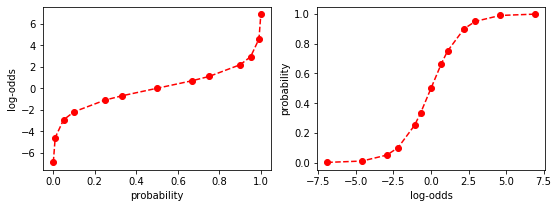

In [25]:
fig, (ax0, ax1) = plt.subplots(1,2, figsize=(9,3))
helper(ax0, probs, log_odds, 'probability', 'log-odds')
helper(ax1, log_odds, probs, 'log-odds', 'probability')

In [26]:
pd.DataFrame([polo_df.min(axis=0),
              polo_df.max(axis=0)], index=['min', 'max']).T

,min,max
Prob(E),0.0000,1.0000
Odds(E:not E),0.0000,inf
Log-Odds,-inf,inf


In [27]:
def logit(probs):
    odds = probs / (1-probs)
    log_odds = np.log(odds)
    return log_odds

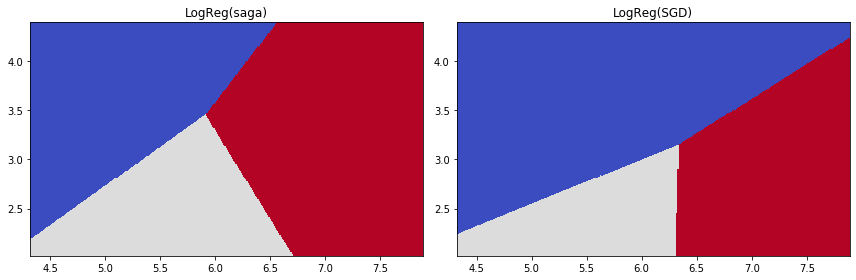

In [28]:
# 두 모델 모두 “regularization”이 기본으로 활성화 되어있습니다.
# 이에 대해서는 9장에서 소개합니다.
LogReg = linear_model.LogisticRegression
SGD    = linear_model.SGDClassifier
logreg_classifiers = {'LogReg(saga)': LogReg(solver='saga', 
                                             multi_class='multinomial',
                                             max_iter=1000),
                      'LogReg(SGD)' :  SGD(loss='log', max_iter=1000)}

fig, axes = plt.subplots(1,2,figsize=(12,4))
axes = axes.flat
for (name, mod), ax in zip(logreg_classifiers.items(), axes):
    plot_boundary(ax, iris.data, iris.target, mod, [0,1])
    ax.set_title(name)
plt.tight_layout()

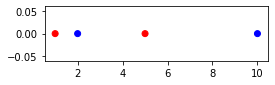

In [29]:
fig, ax = plt.subplots(1,1,figsize=(4,1))

x = np.array([1,2,5,10]).reshape(-1, 1)
y = ['red', 'blue', 'red', 'blue']
ax.scatter(x,np.zeros_like(x), c=y);

In [30]:
# note:  different import source
import statsmodels.api as sm

x = np.c_[x, np.ones_like(x)] # +1 trick
tgt = (np.array(y) == 'red')

# sm.Logit is statsmodels name for logistic regression
(sm.Logit(tgt, x, method='newton')
   .fit()
   .predict(x))  # training predictions

Optimization terminated successfully.
         Current function value: 0.595215
         Iterations 5


array([0.7183, 0.6583, 0.4537, 0.1697])

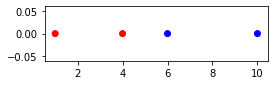

In [31]:
fig, ax = plt.subplots(1,1,figsize=(4,1))

x = np.array([1,4,6,10]).reshape(-1, 1)
y = ['red', 'red', 'blue', 'blue']
ax.scatter(x, np.zeros_like(x), c=y);

In [32]:
x = np.c_[x, np.ones_like(x)] # +1 트릭
tgt = (np.array(y) == 'red')
try:
    (sm.Logit(tgt, x, method='newton')
       .fit()
       .predict(x)) # 훈련 데이터에 예측을 수행합니다.
except Exception as e:
    print(e)

Perfect separation detected, results not available


In [33]:
X = np.array([1,3,5,10,20])
n = len(X)

mean_X = sum(X) / n
errors = X - mean_X
var_X = np.dot(errors, errors) / n

fmt = "long way: {}\nbuilt in: {}\n   close: {}"
print(fmt.format(var_X, 
                 np.var(X), 
                 np.allclose(var_X, np.var(X)))) # 맞는지 확인해봅니다..

long way: 46.16
built in: 46.16
   close: True


In [34]:
X = np.array([1,3,5,10,20])
Y = np.array([2,4,1,-2,12])

mean_X = sum(X) / n
mean_Y = sum(Y) / n

errors_X = X - mean_X
errors_Y = Y - mean_Y

cov_XY = np.dot(errors_X, errors_Y) / n
print("long way: {:5.2f}".format(cov_XY))
print("built in:", np.cov(X,Y,bias=True)[0,1])
# 노트:
# np.cov(X,Y,bias=True)의 결과:  [Cov(X,X), Cov(X,Y)
#                               Cov(Y,X), Cov(Y,Y)]


long way: 21.28
built in: 21.28


In [35]:
var_x = 0
n = len(X)
for i in range(n):
    for j in range(i, n): # 나머지 X를 순회합니다.
        var_x += (X[i] - X[j])**2
print("Var(X):", var_x / n**2)

Var(X): 46.16


In [36]:
cov_xy = 0
for i in range(len(X)):
    for j in range(i, len(X)): # 나머지 X와 Y를 순회합니다.
        cov_xy += (X[i] - X[j])*(Y[i]-Y[j])
print("Cov(X,Y):", cov_xy / n**2)

Cov(X,Y): 21.28


In [37]:
cov_XY = 0.0
xy_pairs = it.product(zip(X,Y), repeat=2)
for (x_i, y_i), (x_j,y_j) in xy_pairs:
    cov_XY += (x_i - x_j) * (y_i - y_j)
print("Cov(X,Y):", cov_XY / (2 * n**2))

Cov(X,Y): 21.28


In [38]:
cov_XX = 0.0
for x_i, x_j in it.combinations(X, 2):
    cov_XX += (x_i - x_j)**2
print("Cov(X,X) == Var(X):", cov_XX / (n**2))

Cov(X,X) == Var(X): 46.16


In [39]:
cov_XY = 0.0
for (x_i, y_i), (x_j,y_j) in it.combinations(zip(X,Y), 2):
    cov_XY += (x_i - x_j) * (y_i - y_j)
print("Cov(X,Y):", cov_XY / (n**2))

Cov(X,Y): 21.28


In [40]:
# 컬러 코딩
# -inf -> 0; 0 -> .5; inf -> 1
# 양끝의 기울기는 천천히, 중간은 빠르게 변합니다.
def sigmoid(x):  
    return np.exp(-np.logaddexp(0, -x))

# 우리가 원하는 색을 얻기 위해서 
# 원래 값이 채워진 배열을 만들어야 합니다.
# 화면에 직접 그리는 것이 아니라 numpy 배열에
# 그림을 그리는 것입니다.
def draw_rectangle(arr, pt1, pt2):
    (x1,y1),(x2,y2) = pt1,pt2
    delta_x, delta_y = x2-x1, y2-y1
    r,c = min(y1,y2), min(x1,x2)  # x,y -> r,c
    # 직사각형의 각 블록에 +/-1을 할당합니다.  
    # 값의 총합은 직사각형의 영역과 같습니다.
    arr[r:r+abs(delta_y), 
        c:c+abs(delta_x)] += np.sign(delta_x * delta_y)

In [41]:
# 데이터 포인트
pts = [(1,1), (3,6), (6,3)]
pt_array = np.array(pts, dtype=np.float64)

# 그림을 그릴 배열
draw_arr = np.zeros((10,10))
ct = len(pts)
c_magic = 1 / ct**2 # 중복 카운팅을 제거하지 않습니다.

# 중복되지 않는 쌍을 만듭니다.
for pt1, pt2 in it.combinations(pts, 2):
    draw_rectangle(draw_arr, pt1, pt2)
draw_arr *= c_magic

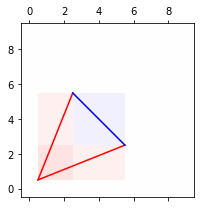

In [42]:
# 배열을 화면에 출력합니다.
from matplotlib import cm
fig, ax = plt.subplots(1,1,figsize=(4,3))
ax.matshow(sigmoid(draw_arr), origin='lower', cmap=cm.bwr, vmin=0, vmax=1)
fig.tight_layout()

# 각 직사각형의 대각선을 그립니다.
# 배열의 요소들은 각 그리드의 중앙에 위치해 있습니다.
# 0.5만큼 왼쪽으로 이동시켜 직선을 그립니다.
ax.plot([ .5, 2.5],[ .5, 5.5], 'r')  # from 1,1 to 3,6 
ax.plot([ .5, 5.5],[ .5, 2.5], 'r')  # from 1,1 to 6,3
ax.plot([2.5, 5.5],[5.5, 2.5], 'b');  # from 3,6 to 6,3

In [43]:
np_cov = np.cov(pt_array[:,0], pt_array[:,1], bias=True)[0,1]
print("Cov(x,y) -   from numpy: {:4.2f}".format(np_cov))

# 그래프를 통해 계산한 공분산을 출력합니다.
print("Cov(x,y) - our long way: {:4.2f}".format(draw_arr.sum()))

Cov(x,y) -   from numpy: 1.22
Cov(x,y) - our long way: 1.22


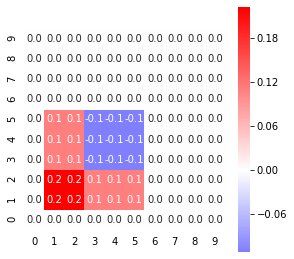

In [44]:
plt.figure(figsize=(4.5,4.5))
hm = sns.heatmap(draw_arr, center=0, 
                 square=True, annot=True, 
                 cmap='bwr', fmt=".1f")
hm.invert_yaxis()
hm.tick_params(bottom=False, left=False)

In [45]:
data = pd.DataFrame({'X':[ 1, 3, 6], 
                     'Y':[ 1, 6, 3], 
                     'Z':[10, 5, 1]})
data.index.name = 'examples'

# 이 예제에서 크게 중요한 부분은 아닙니다만, 
# Pandas의 공분산은 “비편향"입니다만,
# 그동안 우리가 다룬 공분산은 “편향"되어있습니다.
# 자세한 내용은 이 장의 마무리에서 읽어보세요.
display(data)
print("Covariance:")
display(data.cov())

,X,Y,Z
examples,,,
0,1,1,10
1,3,6,5
2,6,3,1


Covariance:


,X,Y,Z
X,6.3333,1.8333,-11.1667
Y,1.8333,6.3333,-5.1667
Z,-11.1667,-5.1667,20.3333


In [46]:
data = pd.DataFrame({'x':[ 3, 6, 3, 4], 
                     'y':[ 9, 6, 3, 0],
                     'z':[ 1, 4, 7, 0]})
data.index.name = 'examples'
display(data)
print("Covariance:")
display(data.cov()) # 편향된 공분산

,x,y,z
examples,,,
0,3,9,1
1,6,6,4
2,3,3,7
3,4,0,0


Covariance:


,x,y,z
x,2.0000,0.0000,0.0000
y,0.0000,15.0000,0.0000
z,0.0000,0.0000,10.0000


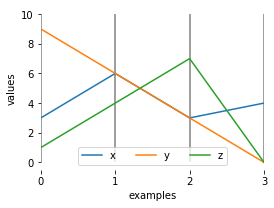

In [47]:
fig, ax = plt.subplots(1,1,figsize=(4,3))
data.plot(ax=ax)
ax.vlines([0,1,2,3], 0, 10, colors=".5")

ax.legend(loc='lower center', ncol=3)

plt.box(False)
ax.set_xticks([0,1,2,3])
ax.set_ylabel("values");

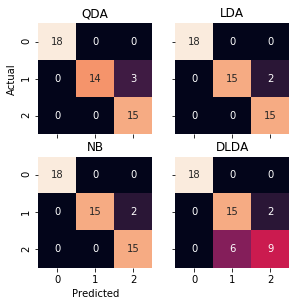

In [48]:
qda  = discriminant_analysis.QuadraticDiscriminantAnalysis()
lda  = discriminant_analysis.LinearDiscriminantAnalysis()
nb   = naive_bayes.GaussianNB()
dlda = DLDA() # mlwpy.py에 구현되어 있습니다.

da_methods = [qda, lda, nb, dlda]
names = ["QDA", "LDA", "NB", "DLDA"]
    
fig, axes = plt.subplots(2,2, figsize=(4.5, 4.5),
                         sharex=True, sharey = True)
for ax, model, name in zip(axes.flat, da_methods, names):
    preds = (model.fit(iris_train_ftrs, iris_train_tgt)
                  .predict(iris_test_ftrs))
    cm = metrics.confusion_matrix(iris_test_tgt, preds)
    sns.heatmap(cm, annot=True, cbar=False, ax=ax)
    ax.set_title(name)

axes[0,0].set_ylabel('Actual')
axes[1,0].set_xlabel('Predicted');

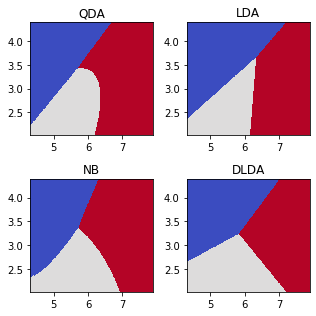

In [49]:
fig, axes = plt.subplots(2,2,figsize=(4.5, 4.5))
axes = axes.flat

for model, ax, name in zip(da_methods, axes, names):
    # 특성 2개로 예측하는 경계를 그립니다.
    plot_boundary(ax, iris.data, iris.target, model, [0,1])
    ax.set_title(name)
plt.tight_layout()

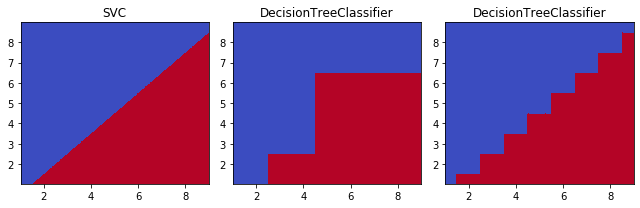

In [50]:
ftrs = np.mgrid[1:10, 1:10].T.reshape(-1,2)
tgt  = ftrs[:,0] > ftrs[:,1]

fig, axes = plt.subplots(1,3,figsize=(9,3))
axes = axes.flat

svc = svm.SVC(kernel='linear')
dt_shallow  = tree.DecisionTreeClassifier(max_depth=3)
dt_deep     = tree.DecisionTreeClassifier()
models = [svc, dt_shallow, dt_deep]

for model, ax in zip(models, axes):
    # 특성 2개로 예측하는 경계를 그립니다.
    plot_boundary(ax, ftrs, tgt, model, [0,1])
    ax.set_title(get_model_name(model))
plt.tight_layout()

In [51]:
digits = datasets.load_digits()

Shape: (8, 8)


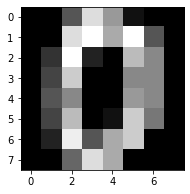

In [52]:
print("Shape:", digits.images[0].shape)
plt.figure(figsize=(3,3))
plt.imshow(digits.images[0], cmap='gray');

In [53]:
digits.target[0]

0

In [54]:
classifier_parade = \
    {'LogReg(1)' : linear_model.LogisticRegression(max_iter=1000),
     'LogReg(2)' : linear_model.SGDClassifier(loss='log',
                                              max_iter=1000),

     'QDA' : discriminant_analysis.QuadraticDiscriminantAnalysis(),
     'LDA' : discriminant_analysis.LinearDiscriminantAnalysis(),
     'GNB' : naive_bayes.GaussianNB(),

     'SVC(1)' : svm.SVC(kernel="linear"),
     'SVC(2)' : svm.LinearSVC(),

     'DTC' : tree.DecisionTreeClassifier(),
     '5NN-C' : neighbors.KNeighborsClassifier(),
     '10NN-C' : neighbors.KNeighborsClassifier(n_neighbors=10)}

baseline = dummy.DummyClassifier(strategy="uniform")

base_score = skms.cross_val_score(baseline, digits.data, digits.target==1, 
                                  cv=10, scoring='average_precision', n_jobs=1)

C:\Users\it\anaconda3\envs\book_base\lib\site-packages\sklearn\discriminant_analysis.py:693: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\it\anaconda3\envs\book_base\lib\site-packages\sklearn\discriminant_analysis.py:693: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\it\anaconda3\envs\book_base\lib\site-packages\sklearn\discriminant_analysis.py:693: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\it\anaconda3\envs\book_base\lib\site-packages\sklearn\discriminant_analysis.py:693: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\it\anaconda3\envs\book_base\lib\site-packages\sklearn\discriminant_analysis.py:693: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\it\anaconda3\envs\book_base\lib\site-packages\sklearn\discriminant_analysis.py:693: UserWarning: Variables are collinear
  war

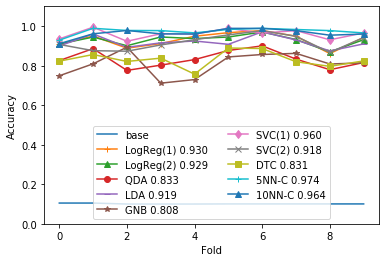

In [55]:
fig, ax = plt.subplots(figsize=(6,4))
ax.plot(base_score, label='base')
for name, model in classifier_parade.items():    
    cv_scores = skms.cross_val_score(model, 
                                     digits.data, digits.target, 
                                     cv=10, 
                                     scoring='f1_macro', 
                                     n_jobs=1)
    my_lbl = "{} {:.3f}".format(name, cv_scores.mean())
    ax.plot(cv_scores, label=my_lbl, marker=next(markers))
ax.set_ylim(0.0, 1.1)
ax.set_xlabel('Fold')
ax.set_ylabel('Accuracy')
ax.legend(loc='lower center', ncol=2);